In [2]:
from PIL import Image

In [3]:
bmp_image = Image.open( 'lena.bmp' )
new_image = Image.new("L",(bmp_image.width,bmp_image.height))

# 1

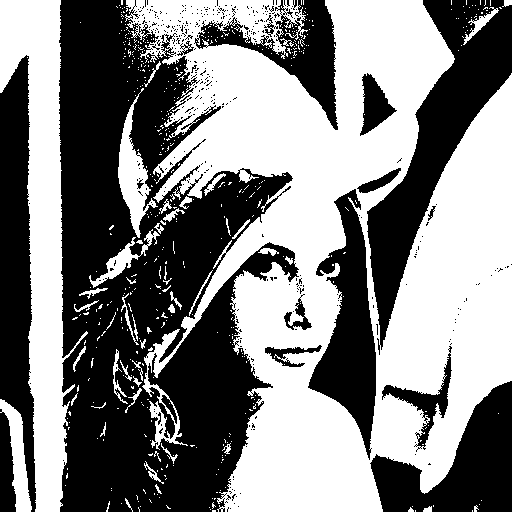

In [4]:
for i in range(new_image.width):
    for j in range(new_image.height):
        pix = bmp_image.getpixel((i,j))
        if pix < 128:
            new_image.putpixel((i,j),0)
        else:
            new_image.putpixel((i,j),255)
new_image.save("1.bmp")
new_image

#for i in range(new_image.width):
#    pix = new_image.getpixel((i,0))
#    print(pix)

# 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt

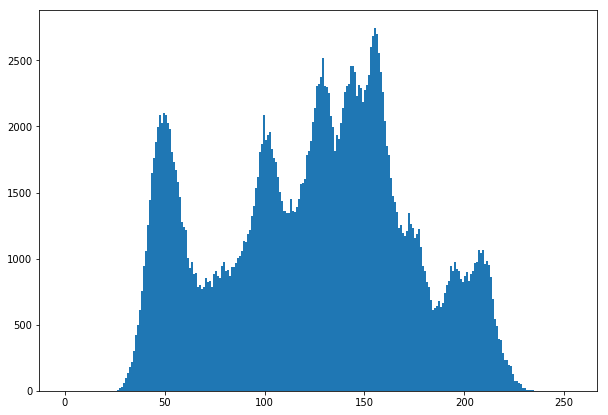

In [6]:
cnt = []
for i in range(bmp_image.width):
    for j in range(bmp_image.height):
        pix = bmp_image.getpixel((i,j))
        cnt.append(pix)
#print(cnt)

plt.figure(figsize=(10,7))
plt.hist(cnt,range(0,255))
plt.savefig("plt.jpg")
plt.show()


# 3

In [79]:
cur_label = 0
label_image = np.zeros((bmp_image.width,bmp_image.height))
pairs = {}

In [80]:
def find_connected(i,j):
    pix = new_image.getpixel((i,j))
    if i-1 < 0 and j-1 < 0:
        return -1
    elif i-1 < 0:
        if new_image.getpixel((i,j-1)) == pix:
            return label_image[i][j-1]
        else:
            return -1
    elif j-1 < 0:
        if new_image.getpixel((i-1,j)) == pix:
            #print(label_image[i-1][j])
            return label_image[i-1][j]
        else:
            return -1
    else :
        if  new_image.getpixel((i-1,j)) != pix and new_image.getpixel((i,j-1)) != pix:
            return -1
        elif new_image.getpixel((i-1,j)) != pix and new_image.getpixel((i,j-1)) == pix:
            return label_image[i][j-1]
        elif new_image.getpixel((i-1,j)) == pix and new_image.getpixel((i,j-1)) != pix:
            return label_image[i-1][j]
        else:
            maxi = max(label_image[i][j-1],label_image[i-1][j])
            mini = min(label_image[i][j-1],label_image[i-1][j])
            if maxi == mini:
                return mini
            else:
                pairs[maxi] = mini 
                return mini
            
            
def check_pix(i,j):
    #print(i,j)
    pix = new_image.getpixel((i,j))
    if j+1 < 512 and i+1 < 512:
        if new_image.getpixel((i,j+1)) != pix and new_image.getpixel((i+1,j)) == pix:
            label_image[i][j] = label_image[i+1][j]
        elif new_image.getpixel((i,j+1)) == pix and new_image.getpixel((i+1,j)) != pix:
            label_image[i][j] = label_image[i][j+1]
        elif new_image.getpixel((i,j+1)) == pix and new_image.getpixel((i+1,j)) == pix:
            maxi = max(label_image[i+1][j],label_image[i][j+1])
            mini = min(label_image[i+1][j],label_image[i][j+1])
            label_image[i][j] = mini
            #print(i,j,mini)
            if maxi!=mini:
                pairs[maxi] = mini 
    elif j+1 > 511 and i+1 < 512:
        if new_image.getpixel((i+1,j)) == pix :
            label_image[i][j] = label_image[i+1][j]
    elif i+1 > 511 and j+1 < 512:
        if new_image.getpixel((i,j+1)) == pix :
            label_image[i][j] = label_image[i][j+1]
    

In [81]:
for j in range(new_image.height):
    for i in range(new_image.width):
        if new_image.getpixel((i,j)) == 255:
            connection = find_connected(i,j)
            if connection == -1:
                cur_label += 1
                label_image[i][j] = cur_label
            else:
                label_image[i][j] = connection  
        #print(i,j,pix,label_image[i][j])
    if len(pairs) > 0:
        for i in range(new_image.width):
            if pairs. __contains__(label_image[i][j]):
                label_image[i][j] = pairs.get(label_image[i][j])
    pairs.clear()

for j in range(new_image.height):
    for i in range(new_image.width):
        if new_image.getpixel((new_image.width-i-1,new_image.height-j-1)) == 255:
            check_pix(new_image.width-i-1,new_image.height-j-1)
    #print(pairs)
    if len(pairs) > 0:
        for i in range(new_image.width):
             if pairs. __contains__(label_image[new_image.width-i-1][new_image.height-j-1]):
                label_image[new_image.width-i-1][new_image.height-j-1] = pairs.get(label_image[new_image.width-i-1][new_image.height-j-1])
    pairs.clear()
print(cur_label)
#im = Image.fromarray(label_image,mode="L")
#im

2727


In [97]:
from PIL import ImageDraw
#bound_image = Image.new("RGB",(bmp_image.width,bmp_image.height))
bound_image = new_image.convert("RGB")

def bound(key):
    if key==0:
        return
    draw = ImageDraw.Draw(bound_image)
    s = [511,511,0,0]
    for j in range(new_image.height):
        for i in range(new_image.width):
            if label_image[i][j] == key:
                if i < s[0]:
                    s[0] = i
                if i > s[2]:
                    s[2] = i
                if j < s[1]:
                    s[1] = j
                if j > s[3]:
                    s[3] = j
    mid_i = (s[0]+s[2])//2
    mid_j = (s[1]+s[3])//2

    draw.rectangle(s, outline='BLUE')
    font = ImageFont.truetype('arial.ttf', 20)
    draw.line((mid_i,mid_j-10,mid_i,mid_j+10),fill="RED")
    draw.line((mid_i-10,mid_j,mid_i+10,mid_j),fill="RED")    

In [98]:
unique, counts = np.unique(label_image, return_counts=True)
component_dic = dict(zip(unique, counts))
for key,value in component_dic.items():
    if value >= 500:
        print(key,value)
        bound(key)

0.0 128184
1.0 18362
4.0 105989
830.0 2048
1600.0 644
2350.0 1490


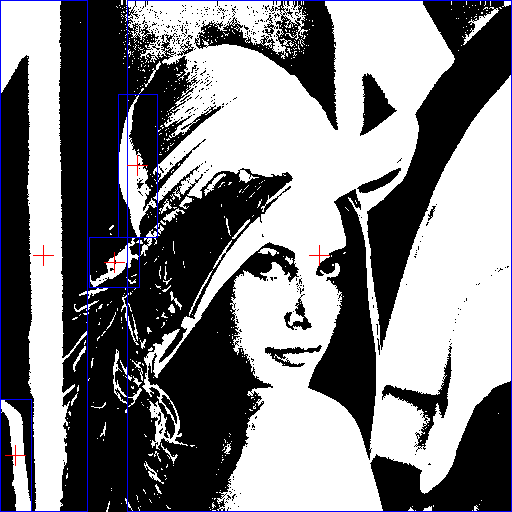

In [99]:
bound_image

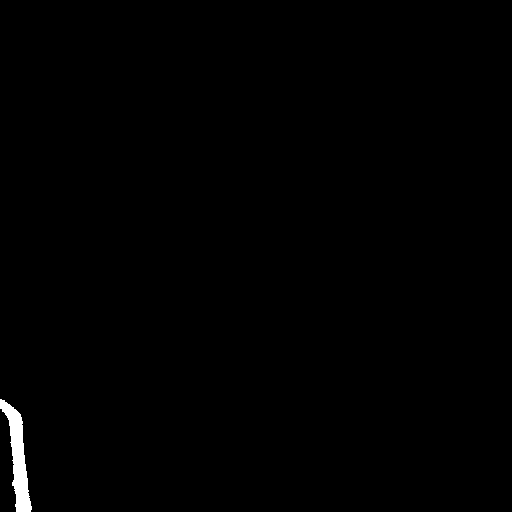

In [93]:
test_image = Image.new("L",(bmp_image.width,bmp_image.height))
for j in range(new_image.height):
        for i in range(new_image.width):
            if label_image[i][j] == 2350:
                test_image.putpixel((i,j),255)
            #elif label_image[i][j] == 1:
            #    test_image.putpixel((i,j),127)
            #elif label_image[i][j] == 2350:
            #    test_image.putpixel((i,j),50)
            else:
                test_image.putpixel((i,j),0)
                
test_image
                